# HW4 : A visit to the movie zoo!

![](https://vignette.wikia.nocookie.net/bojackhorseman/images/f/f2/HSACWDTK%3FDTKT%3FLFO%21%21.png/revision/latest?cb=20150720050503)

## Task
In this homework, your task is to visualize THREE non-typical charts on anything related to your favorite **movie star!**
This means you CANNOT use the Big 4 chart types or their close variants (i.e. Pie, Bar, Line and Scatter, Area, etc.)

You are free to use any other chart type whether or not they were covered in class!
The lecture on Visit To The Zoo is a good place to start to get ideas on what kinds of charts exist.

For the data, you are free to use any data source you deem fit.
For charting, we will NOT be constraining the technology you use. 
You are free to produce the charts in any way you would like.

You will be judged on
* Creativity
* Presentation Quality
* Data Quality (Did your visualization reveal something interesting?)

For extra credit, you can make a fully interactive visualization.

## Ideas for Data Collection

Here, we show an example of how to collect data about Arnold Schwarzenegger!
Do note that this is just an example of the kind of data you can collect.
You are **NOT** constrained
* To the same movie star (you can pick your own!)
* To the same *kind* of data
* To the same data sources
* or to anything else!

This assignment gives you the power to do what you like!

In [ ]:
from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re

#### Get data for Arnold Schwarzenegger

In [110]:
# Get an instance of IMDb class
imdb = ImdbFacade()

# Search for Arnold Schwarzenegger
people = imdb.search_for_name('Arnold Schwarzenegger')
print(people)

(NameSearchResult(imdb_id='nm0000216', name='Arnold Schwarzenegger'), NameSearchResult(imdb_id='nm2200639', name='Patrick Schwarzenegger'), NameSearchResult(imdb_id='nm0004569', name='Sanjay Dutt'))


In [111]:
# Fetch information about him
arnold = imdb.get_name(people[0].imdb_id)

# What information do I have about him?
print('\n'.join([x for x in dir(arnold) if not x.startswith('__')]))

bios
birth_place
date_of_birth
filmography
gender
image
imdb_id
name


In [112]:
# How many movies does he have?
print(len(arnold.filmography))

710


In [113]:
# Let's fetch some more information about a movie
movie = imdb.get_title(arnold.filmography[-1])

In [114]:
# What information can I get about this movie?
print('\n'.join([x for x in dir(movie) if not x.startswith('__')]))

certification
creators
credits
directors
episode
episodes
genres
image
imdb_id
plot_outline
rating
rating_count
release_date
releases
runtime
season
stars
title
type
writers
year


In [115]:
print(movie.imdb_id)

tt0096708


In [116]:
html = """
    <div style="background-color:#FFDDDD">
    <h2> Warning! </h2>
    <p> This code below is meant to be an example of what you can do. <br>
        It is not guaranteed to work always, and will need to be tweaked!
    </p>
    </div>
"""
display(HTML(html))

#### Box office numbers

In [117]:
# Let's experiment with Terminator
imdb_id = 'tt0088247'

# Fetch the box office numbers
base = 'https://www.boxofficemojo.com'
url = base + '/title/' + imdb_id
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
group = table.findAll('tr', recursive=False)[1].find('a').get('href')
url = base + group

# Get total earnings domestic and international
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')
domestic = earnings[1].find('span', {'class': 'money'}).get_text()
domestic_url = earnings[1].find('a').get('href')
international = earnings[2].find('span', {'class': 'money'}).get_text()

# Get weekly domestic earnings
url = base + domestic_url
url = url[:url.rfind('/')] + '/weekly/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
weekly = []
for tr in table[1:]:
    date = tr.findAll('td')[0].get_text()
    earning = tr.findAll('td')[2].get_text()
    weekly.append((date, earning))

# Print the values we've just got!
print("Total Domestic Earnings: %s" % domestic)
print("Total International Earnings: %s" % international)
print("Weekly Domestic Earnings:")
for date, earning in weekly:
    print("\t%s \t: %s" % (date, earning))

Total Domestic Earnings: $38,371,200
Total International Earnings: $40,000,000
Weekly Domestic Earnings:
	Oct 26-Nov 1 	: $5,560,930
	Nov 2-8 	: $5,752,018
	Nov 9-15 	: $4,764,277
	Nov 16-22 	: $5,208,881
	Nov 23-29 	: $4,851,910
	Nov 30-Dec 6 	: $3,741,759
	Dec 7-13 	: $2,002,925
	Dec 14-20 	: $1,399,646
	Dec 21-27 	: $722,260
	Jan 11-17 	: $752,723
	Jan 18-24 	: $618,670


## Other resources!

This assignment doesn't have a restriction on where you can look for data.
Further, we don't mind how you collect the data, or what data you collect.

Here are some additional resources for this example, and you can customize it for your own!
* Arnold Schwarzenegger Kill Count: https://www.youtube.com/watch?v=OE6jpTaOYMU
* Arnold Schwarzenegger Top Quotes: https://www.youtube.com/watch?v=pDxn0Xfqkgw

You could think about the IMDB network as a graph, with different actors connected through movies.

Some other useful libraries/ databases:
* IMDBPy
* http://www.omdbapi.com/

In [5]:
from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re

In [16]:
# Get an instance of IMDb class
imdb = ImdbFacade()

# Search for Arnold Schwarzenegger
people = imdb.search_for_name('Zac Efron')
print(people)

(NameSearchResult(imdb_id='nm1374980', name='Zac Efron'), NameSearchResult(imdb_id='nm8412219', name='Zacharie Féron'), NameSearchResult(imdb_id='nm5340190', name='Grace Frontiera'))


In [17]:
zac = imdb.get_name(people[0].imdb_id)

# What information do I have about him?
print('\n'.join([x for x in dir(zac) if not x.startswith('__')]))

bios
birth_place
date_of_birth
filmography
gender
image
imdb_id
name


In [18]:
# How many movies does he have?
print(len(zac.filmography))

287


In [19]:
print(len([x for x in zac.filmography if x is not None]))

287


In [20]:
zac_movies = []
for i in range(len(zac.filmography)):
    try:
        zac_movies.append(imdb.get_title(zac.filmography[i]))
    except:
        continue

In [21]:
len(zac_movies)

269

In [22]:
# What information can I get about this movie?
print('\n'.join([x for x in dir(zac_movies[-1]) if not x.startswith('__')]))

certification
creators
credits
directors
episode
episodes
genres
image
imdb_id
plot_outline
rating
rating_count
release_date
releases
runtime
season
stars
title
type
writers
year


In [23]:
zac_movies[-1].runtime

In [24]:
import pandas as pd

In [31]:
new_df = pd.DataFrame()
directors = []
for movie in zac_movies:
    inner_li = []
    if len(movie.directors) == 0:
        directors.append("Other")
        continue
        
    for director in movie.directors:
        inner_li.append(director.name)
        
    directors.append(inner_li)
    
new_df["directors"] = pd.Series(directors)
    
writers = []
for movie in zac_movies:
    inner_li = []
    if len(movie.writers) == 0:
        writers.append("Other")
        continue
        
    for writer in movie.writers:
        inner_li.append(writer.name)
        
    writers.append(inner_li)
        
new_df["writers"] = pd.Series(writers)

creators = []
for movie in zac_movies:
    inner_li = []
    if len(movie.creators) == 0:
        creators.append("Other")
        continue
        
    for creator in movie.creators:
        inner_li.append(creator.name)
        
    creators.append(inner_li)

new_df["creators"] = creators

#REDO FOR THISSSSS!!!!!
new_df["idmb_id"] = pd.Series([x.imdb_id for x in zac_movies])




new_df["rating"] = pd.Series([x.rating for x in zac_movies])
new_df["rating_count"]= pd.Series([x.rating_count for x in zac_movies])
new_df["season"] = pd.Series([x.season for x in zac_movies])
new_df["year"] = pd.Series([x.year for x in zac_movies])
new_df["title"] = pd.Series([x.title for x in zac_movies])
new_df["type"] = pd.Series([x.type for x in zac_movies])
new_df["genre"] = pd.Series([d.genres for d in zac_movies])
new_df["runtime"] = pd.Series([d.runtime for d in zac_movies])

In [29]:
import pandas as pd
from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re
#new_df = pd.read_csv("HW4data.csv", encoding='latin-1')

In [32]:
print(len(new_df))
#new_df = new_df.drop(new_df.columns[0], axis=1)
new_df.head()

269


,directors,writers,creators,idmb_id,rating,rating_count,season,year,title,type,genre,runtime
0,Other,"[John LeFevre, John M. Phillips]",Other,tt5462390,NaN,0,None,NaN,Straight to Hell,movie,"(drama,)",NaN
1,"[Glenn Ficarra, John Requa]","[Scott Alexander, Joshua Davis, Glenn Ficarra,...",Other,tt2626396,NaN,0,None,NaN,King of the Jungle,movie,"(comedy, drama)",NaN
2,[Tony Cervone],"[Kelly Fremon Craig, Matt Lieberman, Joe Ruby,...",Other,tt3152592,NaN,0,None,2020.0,Scoob!,movie,"(animation, adventure, comedy, family, horror,...",NaN
3,[Matt Garofalo],"[Chris Bruno, David Howard Lee, Kirk J. Rudell...","[Chris Bruno, David Howard Lee]",tt9845250,6.8,167,None,2019.0,Human Discoveries,tvseries,"(animation, action, adventure, comedy, thriller)",NaN
4,[Harmony Korine],[Harmony Korine],Other,tt6511932,5.5,12206,None,2019.0,The Beach Bum,movie,"(comedy,)",95.0


In [33]:
new_df["standarized_rating"] = (new_df["rating"]-new_df["rating"].mean())/new_df["rating"].std()

In [34]:
new_df.head()

,directors,writers,creators,idmb_id,rating,rating_count,season,year,title,type,genre,runtime,standarized_rating
0,Other,"[John LeFevre, John M. Phillips]",Other,tt5462390,NaN,0,None,NaN,Straight to Hell,movie,"(drama,)",NaN,NaN
1,"[Glenn Ficarra, John Requa]","[Scott Alexander, Joshua Davis, Glenn Ficarra,...",Other,tt2626396,NaN,0,None,NaN,King of the Jungle,movie,"(comedy, drama)",NaN,NaN
2,[Tony Cervone],"[Kelly Fremon Craig, Matt Lieberman, Joe Ruby,...",Other,tt3152592,NaN,0,None,2020.0,Scoob!,movie,"(animation, adventure, comedy, family, horror,...",NaN,NaN
3,[Matt Garofalo],"[Chris Bruno, David Howard Lee, Kirk J. Rudell...","[Chris Bruno, David Howard Lee]",tt9845250,6.8,167,None,2019.0,Human Discoveries,tvseries,"(animation, action, adventure, comedy, thriller)",NaN,0.656325
4,[Harmony Korine],[Harmony Korine],Other,tt6511932,5.5,12206,None,2019.0,The Beach Bum,movie,"(comedy,)",95.0,-0.251118


In [86]:
print(sum(new_df["type"].str.contains("movie"))/len(new_df["type"]))
print(sum(new_df["type"].str.contains("tv"))/len(new_df["type"]))
bar_chart_on_side = pd.DataFrame()
bar_chart_on_side["type"] = ["movie", "tv", "other"]
bar_chart_on_side["frequency"] = [0.20446096654275092, 0.6877323420074349, 1-(0.6877323420074349+0.20446096654275092)]

0.20446096654275092
0.6877323420074349


In [54]:
#makes sense about tmz and awards
bar_chart_on_side

[['movie', 0.20446096654275092],
 ['tv', 0.6877323420074349],
 ['other', 0.10780669144981414]]

In [45]:
most_popular_words_in_movies = {}
stop_words = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]
for title in new_df["title"]:
    for word in title.split():
        w = word.lower()
        if w not in stop_words:
            if w in most_popular_words_in_movies:
                most_popular_words_in_movies[w] += 1
            else:
                most_popular_words_in_movies[w] = 1
li_words = []
for key in most_popular_words_in_movies:
    li_words.append((most_popular_words_in_movies[key], key))
        
li_words.sort(reverse=True)

In [46]:
#categories for my graph
#get count, make radar
li_words[:5]

[(37, 'awards'), (15, 'movie'), (13, 'zac'), (13, 'mtv'), (13, 'choice')]

In [74]:
most_popular_words_in_movies = {}
stop_words = ["-", "a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]
check_tv = new_df["type"].str.contains("tv", na=True)

for index, row in new_df.iterrows():
    if check_tv[index] == 0:
        for word in row["title"].split():
            w = word.lower()
            if w not in stop_words:
                if w in most_popular_words_in_movies:
                    most_popular_words_in_movies[w] += 1
                else:
                    most_popular_words_in_movies[w] = 1
    li_only_movies_words = []
    for key in most_popular_words_in_movies:
        li_only_movies_words.append((most_popular_words_in_movies[key], key))
        
    li_only_movies_words.sort(reverse=True)

In [79]:
li_only_movies_words[:8]

[(11, 'zac'),
 (6, 'hsm2:'),
 (6, 'efron'),
 (5, 'musical'),
 (4, 'school'),
 (4, 'hsm3:'),
 (4, 'high'),
 (3, 'neighbors')]

In [36]:
#f = open("HW4data.csv", "a")
#f.write(new_df.to_csv())
#f.close()

In [67]:
pd.Series([x.type for x in zac_movies]).unique()

array(['movie', 'tvseries', 'video', 'short', 'tvshort', 'tvmovie',
       'tvspecial', 'tvminiseries'], dtype=object)

In [68]:
#So this takes a movie he's covered and takes info from 
# base_url + /title/imdb_id (which is shared I guess)
#then base_url + release groups
import numpy as np

domestic_earnings = []
international_earnings = []
weekly_of_earnings = []

# Let's experiment with Terminator
def get_earnings(imdb_id):

# Fetch the box office numbers
    base = 'https://www.boxofficemojo.com'
    url = base + '/title/' + imdb_id
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source,'lxml')

    table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
    group = table.findAll('tr', recursive=False)[1].find('a').get('href')
    url = base + group

    # Get total earnings domestic and international
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source,'lxml')
    earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')
    domestic = earnings[1].find('span', {'class': 'money'}).get_text()
    domestic_url = earnings[1].find('a').get('href')
    international = earnings[2].find('span', {'class': 'money'}).get_text()

    # Get weekly domestic earnings
    url = base + domestic_url
    url = url[:url.rfind('/')] + '/weekly/'
    source = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(source,'lxml')
    table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
    weekly = []
    for tr in table[1:]:
        date = tr.findAll('td')[0].get_text()
        earning = tr.findAll('td')[2].get_text()
        weekly.append((date, earning))

# Print the values we've just got!
    domestic_earnings.append(domenstic)
    international_earnings.append(international)
    weekly_of_earnings.append(weekly)

for idmb_ids in new_df["idmb_id"]:
    try:
        get_earnings(idmb_ids)
    except:
        domestic_earnings.append(np.nan)
        international_earnings.append(np.nan)
        weekly_of_earnings.append(np.nan)
    
    
new_df["domestic_earnings"] = domestic_earnings
new_df["international_earnings"] = international_earnings
new_df["weekly_earnings"] = weekly_of_earnings

In [70]:
new_df["domestic_earnings"].unique()

array([nan])

In [ ]:
#CHECK THESE ON MOJO!!!
new_df.sort(by="international_earnings")[:20]

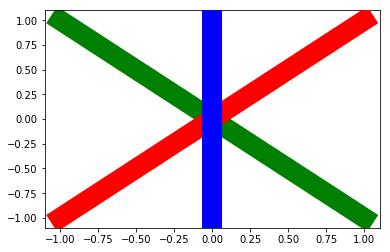

In [3]:
import matplotlib.pyplot as plt

lineWidth = 20
plt.figure()

#zorder specifies highest order on top
#don't do 1,2,3 extraggerate it to work
plt.plot([0,0],[-1,1], lw=lineWidth, c='b',zorder=10)
plt.plot([-1,1],[-1,1], lw=lineWidth, c='r',zorder=5)
plt.plot([-1,1],[1,-1], lw=lineWidth, c='g',zorder=0)
plt.show()

In [2]:
#Creativity
#Presentation Quality
#Data Quality (Did your visualization reveal something interesting?)

#Can't use
#Pie, 
#Bar, 
#Line and 
#Scatter, Area, etc

In [ ]:
#plot same x for both plots

In [ ]:
url = "http://www.omdbapi.com/?i=tt3896198&apikey=a80f34d"

In [ ]:
# I found that many of the actors with zac efron were very different,
# Maybe that's because of the director who directed the movie?

In [ ]:
import plotly.express as px
tips = px.data.tips()
fig = px.scatter(tips, x="total_bill", y="tip", facet_row="time", facet_col="day", color="smoker", trendline="ols",
          category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

In [168]:
switch = gapminder.groupby("iso_alpha").max()["country"]
switch_series = pd.Series(switch.index, index=switch.values)
switch_series.head()

Afghanistan    AFG
Angola         AGO
Albania        ALB
Argentina      ARG
Australia      AUS
Name: iso_alpha, dtype: object

In [198]:
highest_movies = new_df[new_df["type"] == "movie"].sort_values(by=['rating'], ascending=False)[:2].append(new_df[new_df["type"] == "movie"].sort_values(by=['rating'], ascending=False)[3:6])
movie_names = highest_movies["title"].values
highest_movies

,directors,writers,creators,idmb_id,rating,rating_count,season,year,title,type,genre,runtime,standarized_rating,domestic_earnings,international_earnings,weekly_earnings
6,[Michael Gracey],"[Jenny Bicks, Bill Condon, Jenny Bicks]",Other,tt1485796,7.6,208836,None,2017.0,The Greatest Showman,movie,"(biography, drama, musical)",105.0,1.214752,NaN,NaN,NaN
9,[James Franco],"[Scott Neustadter, Michael H. Weber, Greg Sest...",Other,tt3521126,7.4,118638,None,2017.0,The Disaster Artist,movie,"(biography, comedy, drama)",104.0,1.075145,NaN,NaN,NaN
28,[Josh Radnor],[Josh Radnor],Other,tt1872818,6.7,34541,None,2012.0,Liberal Arts,movie,"(comedy, drama, romance)",97.0,0.586522,NaN,NaN,NaN
36,[Richard Linklater],"[Robert Kaplow, Holly Gent, Vincent Palmo Jr.]",Other,tt1175506,6.7,10395,None,2008.0,Me and Orson Welles,movie,"(comedy, drama)",114.0,0.586522,NaN,NaN,NaN
260,[Joe Berlinger],"[Elizabeth Kloepfer, Michael Werwie]",Other,tt2481498,6.6,57887,None,2019.0,"Extremely Wicked, Shockingly Evil and Vile",movie,"(biography, crime, drama, thriller)",110.0,0.516719,NaN,NaN,NaN


In [170]:
switch_series["Domestic"] = "USA"
def convert_iso(country_name):
    if country_name not in switch_series:
        return np.nan
    return switch_series[country_name]

In [176]:
m1 = pd.read_csv("movie1.csv")
m1[m1.columns[1]] = pd.to_numeric(m1[m1.columns[1]], errors='coerce')
m2 = pd.read_csv("movie2.csv")
m2[m2.columns[1]] = pd.to_numeric(m2[m2.columns[1]], errors='coerce')
m3 = pd.read_csv("movie3.csv")
m3[m3.columns[1]] = pd.to_numeric(m3[m3.columns[1]], errors='coerce')
m4 = pd.read_csv("movie4.csv")
m4[m4.columns[1]] = pd.to_numeric(m4[m4.columns[1]], errors='coerce')
m5 = pd.read_csv("movie5.csv")
m5[m5.columns[1]] = pd.to_numeric(m5[m5.columns[1]], errors='coerce')
check = m1.merge(m2, how="outer", left_on=m1.columns[0], right_on=m1.columns[0])
check2 = check.merge(m3, how="outer", left_on=m1.columns[0], right_on=m1.columns[0])
check3 = check2.merge(m4, how="outer", left_on=m1.columns[0], right_on=m1.columns[0])
check4 = check3.merge(m5, how="outer", left_on=m1.columns[0], right_on=m1.columns[0])
check4[check4.columns[0]] = check4[check4.columns[0]].apply(convert_iso)
check4["total_mean"] = check4[check3.columns[1:]].mean(axis=1)
check4.head()
#m1.dtypes

,Region,Gross1,Gross2,Gross3,Gross4,Gross5,total_mean
0,USA,21120616.0,NaN,327345.0,1190003.0,NaN,7.545988e+06
1,FRA,598000.0,5210798.0,NaN,NaN,NaN,2.904399e+06
2,DEU,201000.0,7546872.0,NaN,71363.0,NaN,2.606412e+06
3,GRC,42497.0,335009.0,NaN,NaN,15380.0,1.887530e+05
4,ISL,92138.0,147826.0,NaN,NaN,NaN,1.199820e+05


In [186]:
#CHOROPLETH, WORLDWIDE POPULARITY
import chart_studio.plotly as py
import chart_studio
chart_studio.tools.set_credentials_file(username='Coduhuey', api_key='XET9mwLBX7EkQVPsQEyu')
fig = px.choropleth(check4, locations="Region", color="total_mean", range_color=[0,check4["total_mean"].max()])
fig.show()
py.plot(fig, filename="world_map_zac", auto_open=True)

'https://plot.ly/~Coduhuey/1/'

In [179]:
check4["title"] = pd.Series(['The Greatest Showman', 'The Disaster Artist',
       'Liberal Arts', 'Me and Orson Welles',
       'Extremely Wicked, Shockingly Evil and Vile'])

In [181]:
check4.head()

,Region,Gross1,Gross2,Gross3,Gross4,Gross5,total_mean,title
0,USA,21120616.0,NaN,327345.0,1190003.0,NaN,7.545988e+06,The Greatest Showman
1,FRA,598000.0,5210798.0,NaN,NaN,NaN,2.904399e+06,The Disaster Artist
2,DEU,201000.0,7546872.0,NaN,71363.0,NaN,2.606412e+06,Liberal Arts
3,GRC,42497.0,335009.0,NaN,NaN,15380.0,1.887530e+05,Me and Orson Welles
4,ISL,92138.0,147826.0,NaN,NaN,NaN,1.199820e+05,"Extremely Wicked, Shockingly Evil and Vile"


In [187]:
#polar/radar chart TITLES
import plotly.express as px
col1 = []
col2 = []
line_polar_df = pd.DataFrame()
for i in range(len(li_words[:8])):
    col1.append(li_words[i][0])
    col2.append(li_words[i][1])
    
line_polar_df["count"] = col1
line_polar_df["keyword"] = col2
fig = px.line_polar(line_polar_df, r="count", theta="keyword", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[-2::-1], line_close=True)
fig.show()
print(li_words[:8])

[(37, 'awards'), (15, 'movie'), (13, 'zac'), (13, 'mtv'), (13, 'choice'), (11, 'school'), (11, 'high'), (10, 'musical')]


In [188]:
import chart_studio.plotly as py
py.plot(fig, filename="all_radar_zac", auto_open=True)

'https://plot.ly/~Coduhuey/3/'

In [189]:
col1 = []
col2 = []
line_polar_df = pd.DataFrame()
for i in range(len(li_only_movies_words[:8])):
    col1.append(li_only_movies_words[i][0])
    col2.append(li_only_movies_words[i][1])
    
line_polar_df["count"] = col1
line_polar_df["keyword"] = col2
fig = px.line_polar(line_polar_df, r="count", theta="keyword", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma[-3::-2], line_close=True)
fig.show()
print(li_only_movies_words[:8])

[(11, 'zac'), (6, 'hsm2:'), (6, 'efron'), (5, 'musical'), (4, 'school'), (4, 'hsm3:'), (4, 'high'), (3, 'neighbors')]


In [190]:
py.plot(fig, filename="movie_radar_zac", auto_open=True)

'https://plot.ly/~Coduhuey/5/'

In [191]:
fig = px.bar(bar_chart_on_side, x="type", y="frequency", barmode="group")
fig.show()
print(bar_chart_on_side)

    type  frequency
0  movie   0.204461
1     tv   0.687732
2  other   0.107807


In [192]:
py.plot(fig, filename="bar_freq_media_type", auto_open=True)

'https://plot.ly/~Coduhuey/7/'

In [212]:
grosses = check4.drop("Region", axis=1).sum(axis=0)
#pd.Series(((grosses-grosses.mean())/grosses.std()).values)
highest_movies = highest_movies.reset_index().drop("index", axis=1)
highest_movies["standard_total_mean"] = pd.Series(((grosses-grosses.mean())/grosses.std()).values)
highest_movies[["standarized_rating", "standard_total_mean", "year"]]

,standarized_rating,standard_total_mean,year
0,1.214752,-0.453359,2017.0
1,1.075145,1.663560,2017.0
2,0.586522,-0.705472,2012.0
3,0.586522,-0.694605,2008.0
4,0.516719,-0.622293,2019.0


In [ ]:
#timeline with his potrait in different colors STANDARIZED RATING AND EARNINGS




In [ ]:
#save it on account
#py.plot(fig, filename="", auto_open=True)

#get graph
#tls.get_embed("https://plo.ly/~username/numberofgraph")

In [216]:
#copy and paste what this returns to html<iframe src=>
import chart_studio.tools as tls
tls.get_embed("https://plot.ly/~Coduhuey/1")

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~Coduhuey/1.embed" height="525" width="100%"></iframe>'

In [219]:
tls.get_embed("https://plot.ly/~Coduhuey/3")

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~Coduhuey/3.embed" height="525" width="100%"></iframe>'

In [220]:
tls.get_embed("https://plot.ly/~Coduhuey/5")

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~Coduhuey/5.embed" height="525" width="100%"></iframe>'

In [221]:
tls.get_embed("https://plot.ly/~Coduhuey/7")

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~Coduhuey/7.embed" height="525" width="100%"></iframe>'

In [ ]:
pandas.groupby(director)???????